In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from collections import OrderedDict
from functools import partial
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold


# Sample Embedding

In [2]:
#Read data
data = pd.read_csv('./sampleweighted_embedding_v2.tsv', sep='\t')
X=data.to_numpy()

In [3]:
##TSNE
xx=data
tsne_2d = TSNE(n_components=2, init='pca', random_state=0, perplexity=30, n_iter=5000, method='exact', verbose=1,learning_rate=10)
DR_results_2d = tsne_2d.fit_transform(xx)
DR_results_df_2d=pd.DataFrame(DR_results_2d)
DR_results_df_2d.to_csv('./sampleembedding_w_2d.tsv', sep='\t')


tsne_3d = TSNE(n_components=3, init='pca', random_state=0, perplexity=30, n_iter=5000, method='exact', verbose=1,learning_rate=10)
DR_results_3d = tsne_3d.fit_transform(xx)
DR_results_df_3d=pd.DataFrame(DR_results_3d)
DR_results_df_3d.to_csv('./sampleembedding_w_3d.tsv', sep='\t')


[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 976 / 976
[t-SNE] Mean sigma: 0.260449
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.437725
[t-SNE] KL divergence after 5000 iterations: 0.847472
[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 976 / 976
[t-SNE] Mean sigma: 0.260449
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.451195
[t-SNE] KL divergence after 1750 iterations: 0.752369


In [8]:
#k-means clustering
def kmeans_clustering(x, n_c):
    kmeans= KMeans(n_clusters=n_c, random_state=0)
    labels = kmeans.fit_predict(x)
    return labels

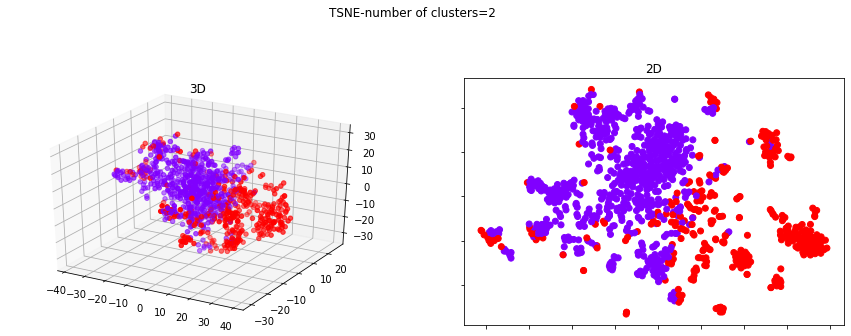

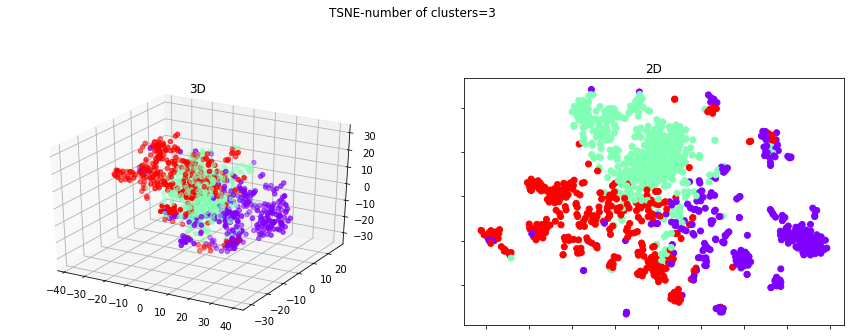

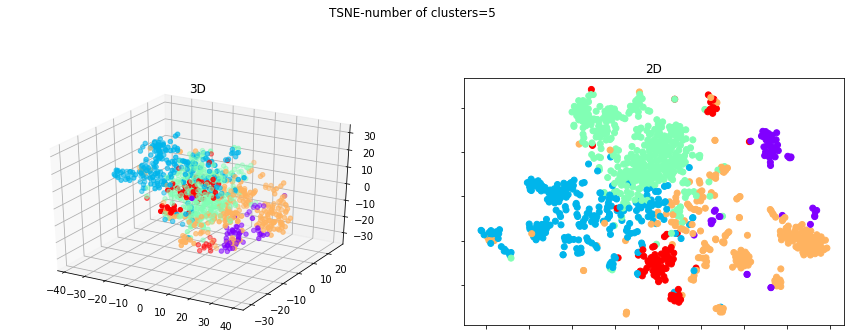

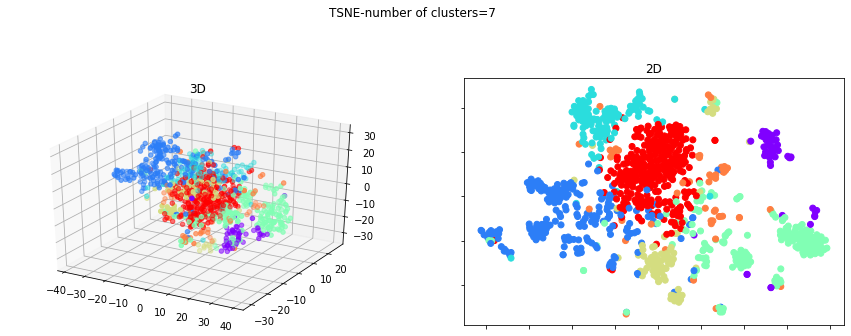

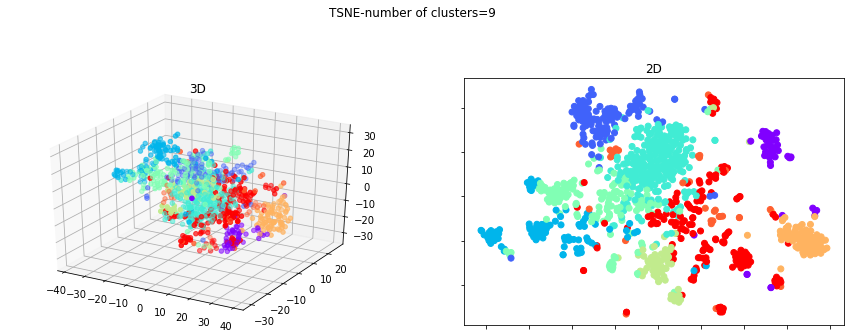

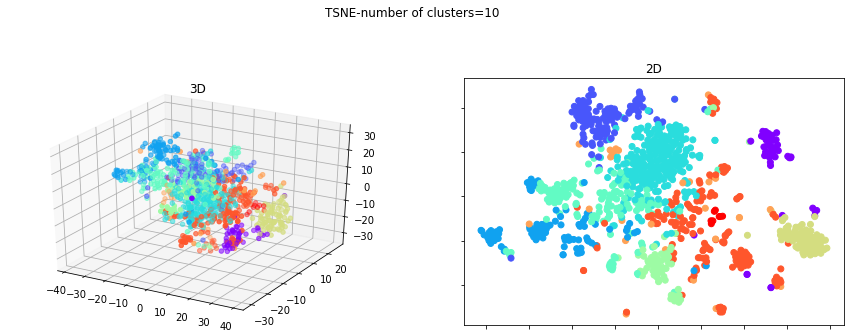

In [5]:
num_clusters=[2, 3, 5, 7, 9, 10]
for i, n in enumerate(num_clusters):
    
    labels=kmeans_clustering(X, n)
    color = labels.ravel()
    df = pd.DataFrame(labels)
    df.to_csv('./sample_clustering_kmean_w_n=' + '%d' %n +'.tsv', sep='\t')
    
    fig = plt.figure(figsize=(15, 10))
    plt.suptitle("TSNE-number of clusters=%d" % n)
    ax = fig.add_subplot(221,projection='3d')
    plt.title("3D")
    ax.scatter(DR_results_df_3d[0], DR_results_df_3d[1], DR_results_df_3d[2], c=color , cmap=plt.cm.rainbow)

    ax = fig.add_subplot(222)
    plt.scatter(DR_results_df_2d[0], DR_results_df_2d[1], c=color , cmap=plt.cm.rainbow)
    plt.title("2D")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')
    
    plt.show()


# Gene Embedding

In [4]:
#Read data
data = pd.read_csv('./geneweighted_embedding_v2.tsv', sep='\t')
X=data.to_numpy()

In [5]:
##TSNE
xx=data
tsne_2d = TSNE(n_components=2, init='pca', random_state=0, perplexity=30, verbose=1)
DR_results_2d = tsne_2d.fit_transform(xx)
DR_results_df_2d=pd.DataFrame(DR_results_2d)
DR_results_df_2d.to_csv('./geneembedding_w_2d.tsv', sep='\t')


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 57821 samples in 0.938s...
[t-SNE] Computed neighbors for 57821 samples in 1106.328s...
[t-SNE] Computed conditional probabilities for sample 1000 / 57821
[t-SNE] Computed conditional probabilities for sample 2000 / 57821
[t-SNE] Computed conditional probabilities for sample 3000 / 57821
[t-SNE] Computed conditional probabilities for sample 4000 / 57821
[t-SNE] Computed conditional probabilities for sample 5000 / 57821
[t-SNE] Computed conditional probabilities for sample 6000 / 57821
[t-SNE] Computed conditional probabilities for sample 7000 / 57821
[t-SNE] Computed conditional probabilities for sample 8000 / 57821
[t-SNE] Computed conditional probabilities for sample 9000 / 57821
[t-SNE] Computed conditional probabilities for sample 10000 / 57821
[t-SNE] Computed conditional probabilities for sample 11000 / 57821
[t-SNE] Computed conditional probabilities for sample 12000 / 57821
[t-SNE] Computed conditional probabilities for 

In [6]:
tsne_3d = TSNE(n_components=3, init='pca', random_state=0, perplexity=30, verbose=1)
DR_results_3d = tsne_3d.fit_transform(xx)
DR_results_df_3d=pd.DataFrame(DR_results_3d)
DR_results_df_3d.to_csv('./geneembedding_w_3d.tsv', sep='\t')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 57821 samples in 0.933s...
[t-SNE] Computed neighbors for 57821 samples in 1097.031s...
[t-SNE] Computed conditional probabilities for sample 1000 / 57821
[t-SNE] Computed conditional probabilities for sample 2000 / 57821
[t-SNE] Computed conditional probabilities for sample 3000 / 57821
[t-SNE] Computed conditional probabilities for sample 4000 / 57821
[t-SNE] Computed conditional probabilities for sample 5000 / 57821
[t-SNE] Computed conditional probabilities for sample 6000 / 57821
[t-SNE] Computed conditional probabilities for sample 7000 / 57821
[t-SNE] Computed conditional probabilities for sample 8000 / 57821
[t-SNE] Computed conditional probabilities for sample 9000 / 57821
[t-SNE] Computed conditional probabilities for sample 10000 / 57821
[t-SNE] Computed conditional probabilities for sample 11000 / 57821
[t-SNE] Computed conditional probabilities for sample 12000 / 57821
[t-SNE] Computed conditional probabilities for 

In [10]:
DR_results_df_3d=pd.read_csv('./geneembedding_w_3d.tsv', sep='\t')
DR_results_df_2d=pd.read_csv('./geneembedding_w_2d.tsv', sep='\t')

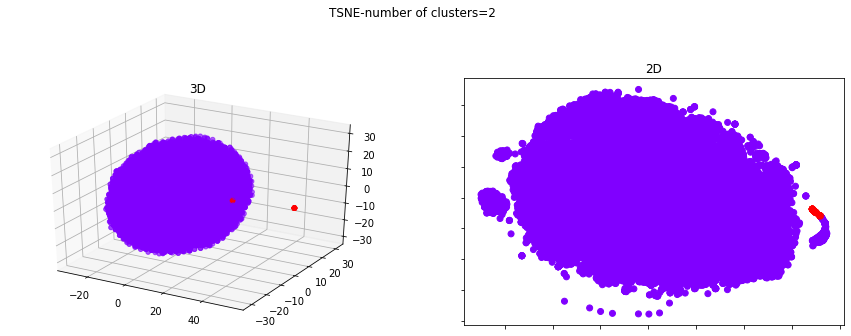

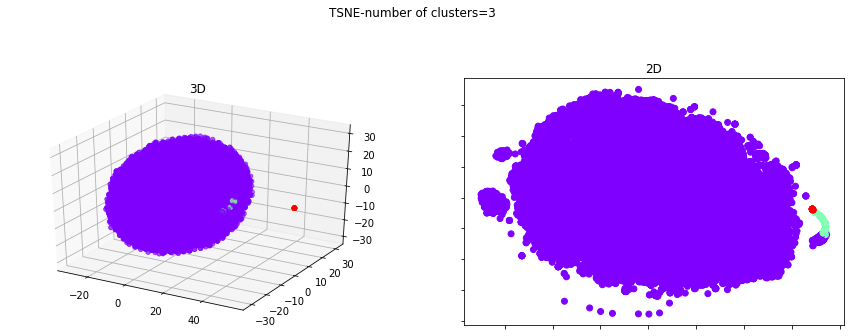

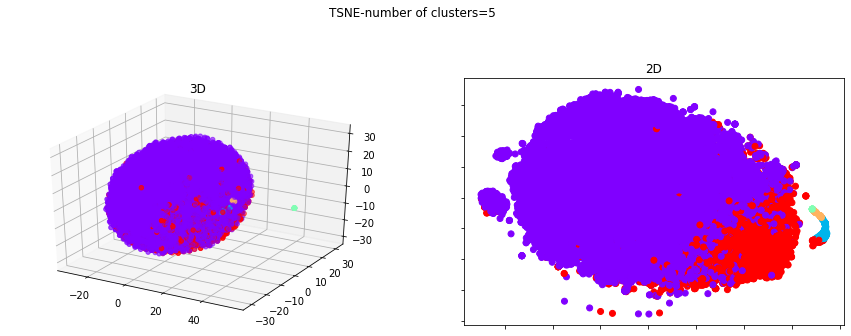

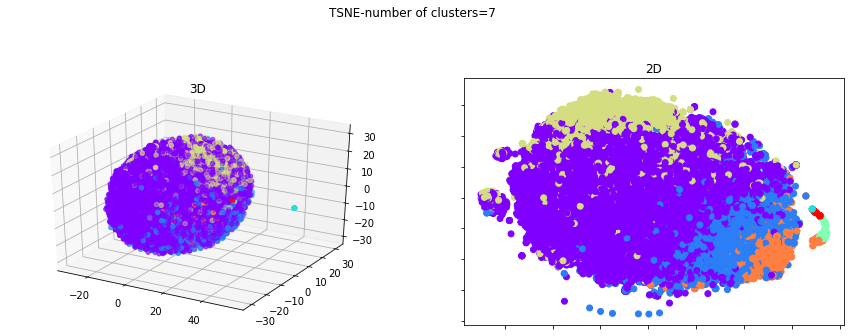

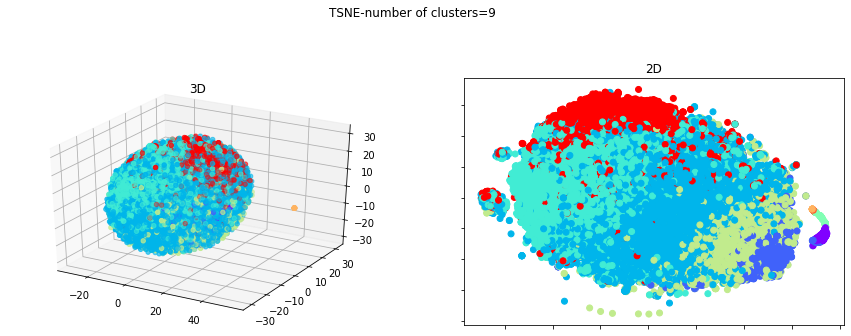

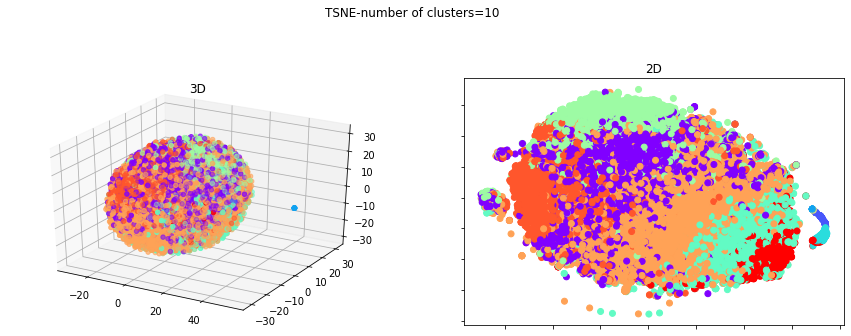

In [18]:
num_clusters=[2, 3, 5, 7, 9, 10]
for i, n in enumerate(num_clusters):
    
    labels=kmeans_clustering(X, n)
    color = labels.ravel()
    df = pd.DataFrame(labels)
    df.to_csv('./gene_clustering_kmean_w_n=' + '%d' %n +'.tsv', sep='\t')

    fig = plt.figure(figsize=(15, 10))
    plt.suptitle("TSNE-number of clusters=%d" % n)
    ax = fig.add_subplot(221,projection='3d')
    plt.title("3D")
    ax.scatter(DR_results_df_3d['0'], DR_results_df_3d['1'], DR_results_df_3d['2'], c=color , cmap=plt.cm.rainbow)

    ax = fig.add_subplot(222)
    plt.scatter(DR_results_df_2d['0'], DR_results_df_2d['1'], c=color , cmap=plt.cm.rainbow)
    plt.title("2D")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')
    
    plt.show()
